In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [5]:
df=pd.read_excel("jharkhand_with_time_block.xlsx")

In [8]:
# Features and target
feature_cols = [col for col in df.columns if col not in ['timestamp', 'Demand']]
X = df[feature_cols].values
y = df[['Demand']].values


In [9]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


In [10]:
n_blocks = 96
X_train = X_scaled[:-n_blocks]
X_test = X_scaled[-n_blocks:]
y_train = y_scaled[:-n_blocks]
y_test = y_scaled[-n_blocks:]


In [11]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3141
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1044  
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0666 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0581 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0533 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0454 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0403 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0485 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0344 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0347 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0344 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0315
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0297 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0368 
Epoch 16/100
6/6 

In [12]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 


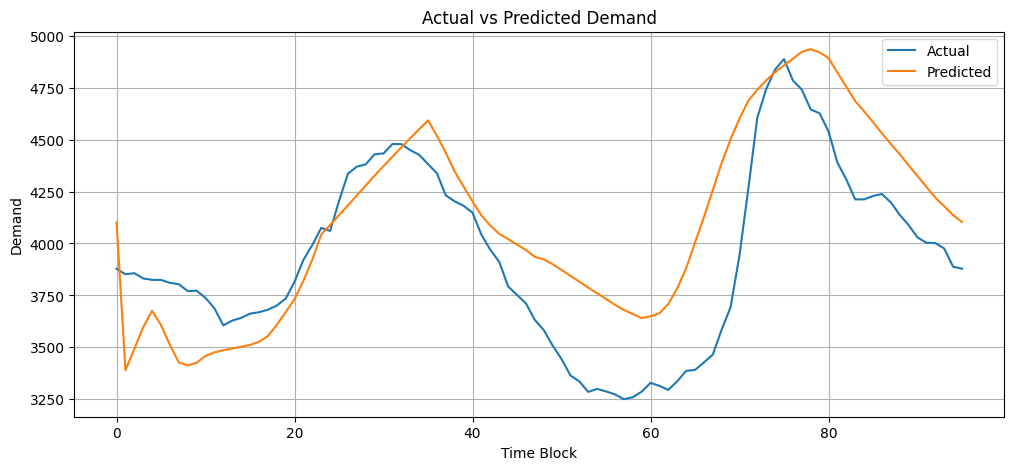

In [13]:
plt.figure(figsize=(12,5))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Block')
plt.ylabel('Demand')
plt.legend()
plt.grid()
plt.show()


In [14]:
mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
accuracy = 100 - (mae / np.mean(y_actual)) * 100

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, Accuracy: {accuracy:.2f}%")

MAE: 271.89, RMSE: 327.05, Accuracy: 93.09%
